# TODO Rewrite
## Table of Contents
0. [Setting up imports](#imports) <pre>

1. [Framing the problem](#framing) <pre>

2. [Getting and understanding the data](#data-gather) <br/>
    2.1 [Importing the data](#data-import)<br/>
    2.2 [Data Exploration](#data-explore)<br/>
    2.3 [Data Visualization](#data-visualize) <br/>
    2.4 [Feature Engineering](#data-engineering) <pre>

3. [Data Preparation (Pipelining)](#pipelining) <br/>
    3.1 [Custom Attributes Pipeline](#idk) <br/>
    3.2 [Categorical Attributes](#idk) <br/>
    3.3 [Numerical Attributes](#idk) <pre>


4. [Model Exploration](#models) <br/>
    4.1 [Linear Regression](#linreg) <br/>
    4.2 [Decision Tree Regression](#dtreg) <br/>
    4.3 [Random Forest Regressor](#rfg) <br/>
    4.4 [XGBoost Regressor](#xgb) <pre>

5. [Comparison/Selection](#presentation)<br/>
    5.1 [Comparison](#compare) <br/>
    5.2 [Selected Model](#selected) <br/>
    5.3 [Fine Tuning](#tuning) <pre>

6. [Export](#export) <br/>
    6.1 [Export as CSV](#csv) <br/>
    6.2 [Write model to disk](#writedisk) <pre>

7. [Sources and Credits](#creds)

# Setting up imports <a id="imports"></a>

In [18]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from utils import rwutils

# SciKit
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# TensorFlow
import tensorflow as tf
from tensorflow import keras

# Framing the problem <a id="framing"></a>
Our problem is best framed as a multi-class single-label classification problem, which predicts whether a image will be in one of ten classes: 
<ul>
    <li>T-shirt/top</li>
    <li>Trouser</li>
    <li>Pullover</li>
    <li>Dress</li>
    <li>Coat</li>
    <li>Sandal</li>
    <li>Shirt</li>
    <li>Sneaker</li>
    <li>Bag</li>
    <li>Ankle boot</li>
</ul>

The data set contains a training set of 60,000 images and a test set of 10,000 images from Zalando's past articles.


# Getting and understanding the data <a id="data-gather"></a>

## Importing the data <a id="data-import"></a>

In [19]:
train = pd.read_csv("datasets/fashion-mnist_train.csv")

In [20]:
test = pd.read_csv("datasets/fashion-mnist_test.csv")

In [21]:
df = pd.concat([train, test])

## Data Exploration <a id="data-explore"></a>

In [22]:
%%time

display(train.head())
print()
print(train.shape, "\n")
print(train.info())
print()
display(train.describe())

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0



(60000, 785) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 359.3 MB
None



,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.00000
mean,4.500000,0.000900,0.006150,0.035333,0.101933,0.247967,0.411467,0.805767,2.198283,5.682000,...,34.625400,23.300683,16.588267,17.869433,22.814817,17.911483,8.520633,2.753300,0.855517,0.07025
std,2.872305,0.094689,0.271011,1.222324,2.452871,4.306912,5.836188,8.215169,14.093378,23.819481,...,57.545242,48.854427,41.979611,43.966032,51.830477,45.149388,29.614859,17.397652,9.356960,2.12587
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,4.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,58.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,9.000000,16.000000,36.000000,226.000000,164.000000,227.000000,230.000000,224.000000,255.000000,254.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,170.00000


Wall time: 1.86 s


We'll check the label distribution...

<AxesSubplot:>

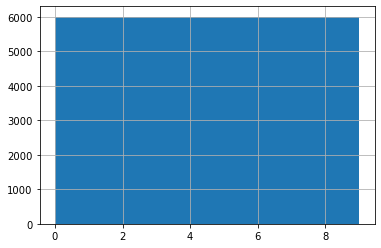

In [23]:
train.label.hist()

... and they seem perfectly distributed

Currently our data is stored in DataFrames, but we want it to be stored in arrays for later use. The data and labels will be stored separately.

In [24]:
x = train.iloc[:,1:].values
y = train.iloc[:,0].values

Each image in the dataset is mapped to a single label. Since the labels are not included in with the dataset, we'll be storing them for later when plotting the images. We also want to store the number of classes as this will be useful when we build our model(s).

In [25]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
num_classes = len(class_names)

In [26]:
# Checking the data type of x and y
print("Label y data type       :", y.dtype)
print("Image pixel x data type :", x.dtype)

Label y data type       : int64
Image pixel x data type : int64


In [27]:
x[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   4,   0,   0,
         0,   0,   0,  62,  61,  21,  29,  23,  51, 136,  61,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,  88, 201, 228, 225, 255, 115,  62, 137, 255, 235, 222,
       255, 135,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,  47, 252, 234, 238, 224, 215, 215, 229, 108, 180, 207,
       214, 224, 231, 249, 254,  45,   0,   0,   0,   0,   0,   0,   0,
         0,   1,   0,   0, 214, 222, 210, 213, 224, 225, 217, 22

## Data Visualization <a id="data-visualize"></a>

We want our data to be shaped as 28x28

In [28]:
a = x[0].reshape(28,28)
a

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   4,   0,   0,   0,   0,   0,  62,  61,  21,
         29,  23,  51, 136,  61,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  88, 201, 228, 225, 255, 115,
         62, 137, 255, 235, 222, 255, 135,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  47, 252, 234, 238, 224, 215, 215, 229,
        108, 180, 207, 214, 224, 231, 249, 254,  45,   0,   0,   0,   0,
          0,   0],
       [  

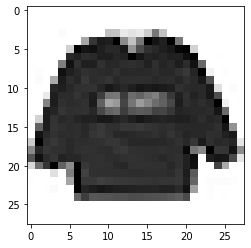

In [29]:
plt.imshow(a, cmap=plt.cm.binary)

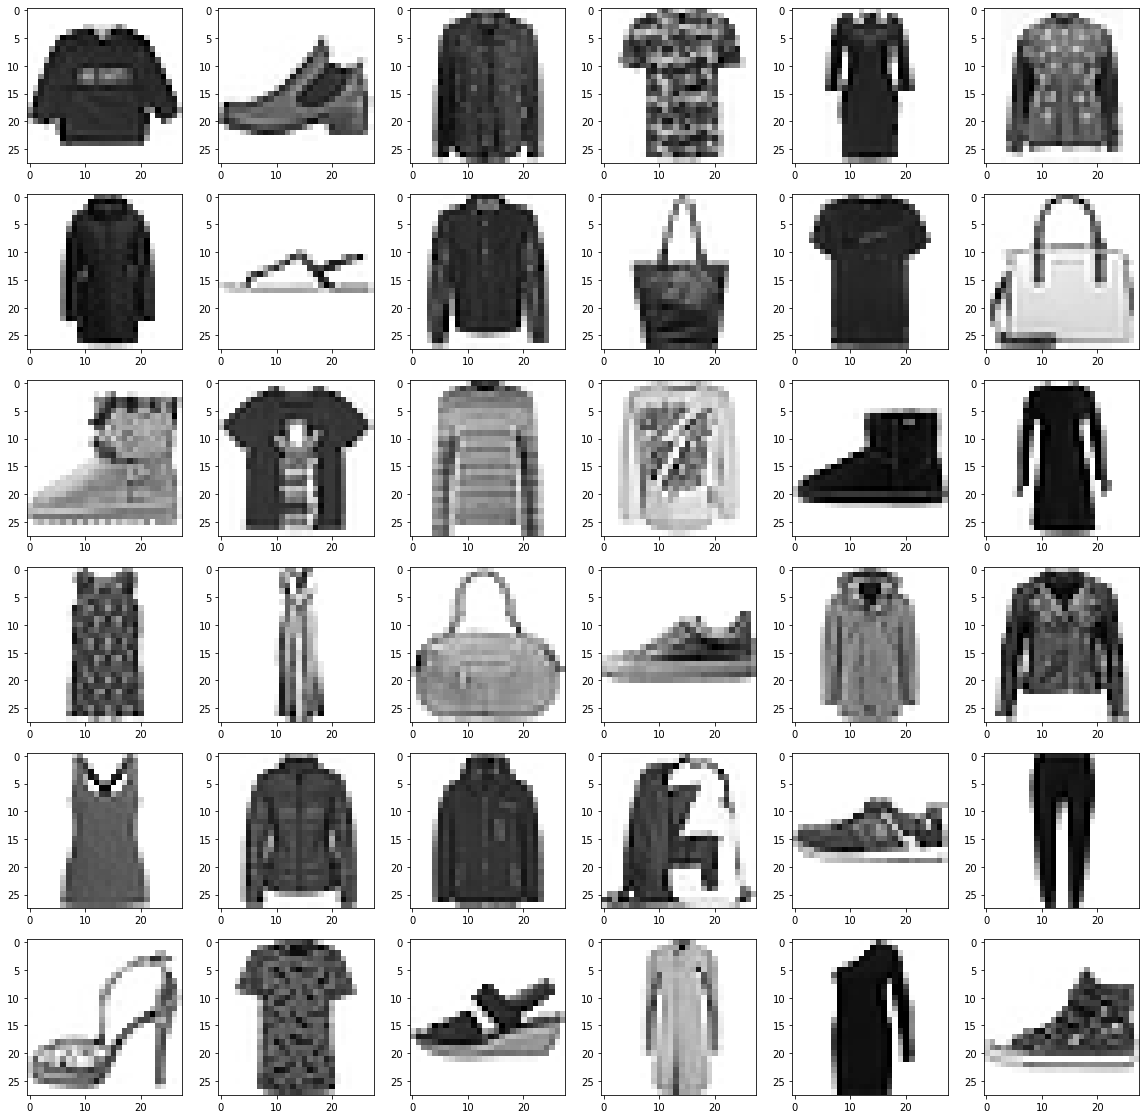

In [30]:
plt.figure(figsize=(20,20))
for i in range(36):
    a = x[i].reshape(28,28)
    plt.subplot(6, 6, (i+1))
    plt.imshow(a, cmap=plt.cm.binary)

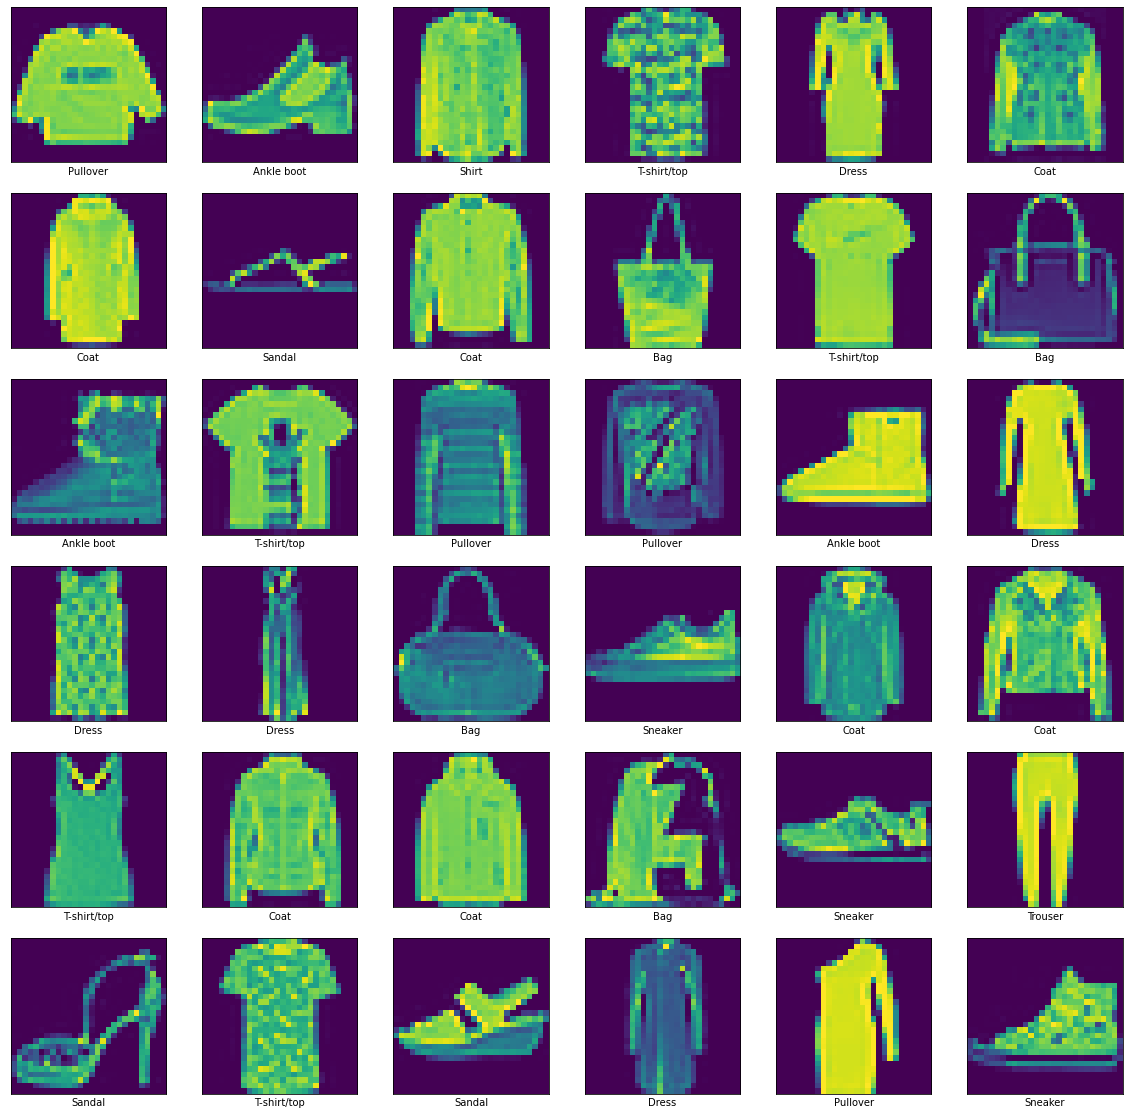

In [31]:
plt.figure(figsize=(20,20))
for i in range(36):
    plt.subplot(6, 6, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    a = x[i].reshape(28,28)
    plt.imshow(a)
    plt.xlabel(class_names[y[i]])

## Feature Engineering <a id="data-engineering"></a>

In [32]:
col_names = "Sandal", "Sneaker", "Ankle boot"

sandal_ix, sneaker_ix, ankle_boot_ix = [class_names.index(c) for c in col_names]

print(sandal_ix)
print(sneaker_ix)
print(ankle_boot_ix)

train[train["label"] == sneaker_ix]

5
7
9


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
21,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
35,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
47,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
48,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59965,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59970,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59974,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59984,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Data Preparation (Pipelining) <a id="pipelining"></a>
First we create a train-test-split with a 80%/20% distribution.

In [33]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.20)

## Preprocessing the data
If we inspect one of the images in the training set we can see that the pixel values are in range of 0 to 255:

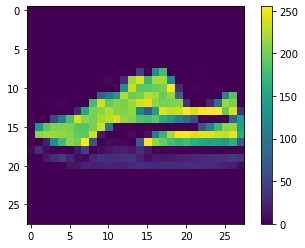

In [ ]:
plt.figure()
plt.imshow(X_train[0].reshape(28,28))
plt.colorbar()
plt.grid(False)
plt.show()

Before feeding our model we want to scale these values to a range of 0 to 1. We do this for both the <i>training set</i> and the <i>test set</i>:

In [34]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [35]:
len(X_test)

12000

In [36]:
X_train = X_train.reshape(len(X_train), 28, 28)
X_test = X_test.reshape(len(X_test), 28, 28)

## Custom Attributes Pipeline <a id="idk"></a>

# K-Nearest Neighbors <a id="exploration"></a>

In [ ]:
%%time

lower_bound = 1
upper_bound = 15

error_rate = []

for i in range(lower_bound, upper_bound):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(20,12))

plt.plot(range(lower_bound, upper_bound), error_rate, color="blue", linestyle="dashed", marker="o", markersize=20)

plt.title("Error Rate vs K-value")

plt.xlabel("K")
plt.ylabel("Error Rate")

It is quite clear from the figure above that <i>n_neighbors=4</i> yields the lowest error rate and we'll go forward using this.

In [28]:
clf = KNeighborsClassifier(n_neighbors=4)

In [ ]:
clf.fit(X_train, y_train)

In [ ]:
%%time
y_pred = clf.predict(X_test)

Wall time: 14.2 s


# Evaluation

In [ ]:
accuracy_score(y_test, y_pred)

In [ ]:
print(confusion_matrix(y_test, y_pred))

In [ ]:
print(classification_report(y_test, y_pred))

In [33]:
rwutils.writeModel(clf, "knn.pkl")

# Data Preparation (Pipelining)
Using PCA to reduce number of features

In [ ]:
pca = PCA(n_components=None)

X_train_new = pca.fit_transform(X_train)
X_test_new = pca.fit_transform(X_test)

print(X_train.shape)
print(X_train_new.shape)

## Finding optimum number of PCA dimensions

In [ ]:
%%time

accuracy = []

for i in range(1, 100):
    pca = PCA(n_components=i)
    train = pca.fit_transform(X_train)
    test = pca.transform(X_test)
    clf.fit(train, y_train)
    pred = clf.predict(test)
    score = accuracy_score(y_test, pred)
    print("%.15s %.15s" % ("Dimensions : ", i), ("Accuracy = ", score))
    accuracy.append(score)

# Neural Network

## Setting up layers
We will be using the Sequential model as our network consists of a linear stack of layers.

We need to think about which layers we want to chain together. 

First we'll <i>flatten</i> to transform the images from a 2d-array of 28 by 28 pixels to a 1d-array of 784 pixels. This is only to reformat the data and has no parameters for the model to learn.

In [39]:
model = keras.Sequential([
    keras.Input(shape=(28,28)),
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(num_classes, activation=tf.nn.softmax)
])

## Compile model

Before training the model we have to compile it. When compiling we need to give the model a few more settings.

<ul>
    <li><i>Loss function</i> measures how accurate our model is during training. We will be using SparseCategoricalCrossentropy which trains the model to output a probability over the 10 classes for each image.</li>
    <li><i>Optimizer</i> helps us get results faster by updating attributes such as weights and learning rate to reduce the loss function.<br> The Adam algorithm is a popular algorithm which efficiently solves practical deep learning problems (Brownlee, 2017). It combines the advantages of two extensions of stochastic gradient descent, AdaGrad and RMSProp, to realize the benefits of both of them.</li>
    <li><i>Metrics</i> are used to monitor training and testing. In this notebook we will use <i>accuracy</i> which calculates how often predictions equal the correct labels.</li>
</ul>

In [40]:
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

## Training the model

In [41]:
model.fit(X_train, y_train, epochs=20)

Epoch 1/20
1500/1500 [==============================] - 1s 714us/step - loss: 0.5265 - accuracy: 0.8177
Epoch 2/20
1500/1500 [==============================] - 1s 645us/step - loss: 0.3921 - accuracy: 0.8594
Epoch 3/20
1500/1500 [==============================] - 1s 656us/step - loss: 0.3544 - accuracy: 0.8704
Epoch 4/20
1500/1500 [==============================] - 1s 662us/step - loss: 0.3260 - accuracy: 0.8797
Epoch 5/20
1500/1500 [==============================] - 1s 679us/step - loss: 0.3075 - accuracy: 0.8866
Epoch 6/20
1500/1500 [==============================] - 1s 645us/step - loss: 0.2924 - accuracy: 0.8933
Epoch 7/20
1500/1500 [==============================] - 1s 651us/step - loss: 0.2787 - accuracy: 0.8948
Epoch 8/20
1500/1500 [==============================] - 1s 651us/step - loss: 0.2649 - accuracy: 0.9023
Epoch 9/20
1500/1500 [==============================] - 1s 623us/step - loss: 0.2566 - accuracy: 0.9032
Epoch 10/20
1500/1500 [==============================] - 1s 604u

## Evaluate accuracy

asd

In [42]:
test_loss, test_acc = model.evaluate(X_test, y_test)

print("Test accuracy:", test_acc)

375/375 [==============================] - 0s 640us/step - loss: 0.3408 - accuracy: 0.8897
Test accuracy: 0.8896666765213013


In [62]:
X_test.shape

(12000,)

In [60]:
def flip(np_arr):
    return np.fliplr(np_arr)

X_test_flipped = np.empty([12000, 28, 28])

for i in X_test:
    np.append(X_test_flipped, flip(i))

print(X_test_flipped)

[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 ...

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]]


In [61]:
test_loss, test_acc = model.evaluate(X_test_flipped, y_test)

375/375 [==============================] - 0s 785us/step - loss: 5.8873 - accuracy: 0.1002


## Making predictions

In [63]:
predictions = model.predict(X_test)

In [64]:
predictions[0]

array([2.3694140e-18, 2.7020031e-27, 1.4536658e-22, 2.2163085e-34,
       3.8357781e-29, 1.0000000e+00, 4.9567357e-20, 9.0336770e-20,
       7.0015681e-27, 1.8320023e-19], dtype=float32)

In [65]:
np.argmax(predictions[0])

5

In [66]:
y_test[0]

5

In [135]:
model.save("./models/keras/", include_optimizer=True)

INFO:tensorflow:Assets written to: ./models/keras/assets


In [75]:
tf.saved_model.save(model, "./models/tensor")

INFO:tensorflow:Assets written to: ./models/tensor\assets


In [73]:
loaded_model = keras.models.load_model("./models/keras")

In [124]:
for i in range(len(class_names)):
    print("{:11s} at {:2.2f}% certainty".format(class_names[i], 100*single_prediction[0][i]))

T-shirt/top at 63.41% certainty
Trouser     at 0.00% certainty
Pullover    at 0.39% certainty
Dress       at 0.07% certainty
Coat        at 0.49% certainty
Sandal      at 0.00% certainty
Shirt       at 35.63% certainty
Sneaker     at 0.00% certainty
Bag         at 0.01% certainty
Ankle boot  at 0.00% certainty


# Sources

<ul>
    <li>
        Brownlee, J. (2017, July 3) <i>Gentle Introduction to the Adam Optimization Algorithm for Deep Learning</i><br>
        https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/
    </li>
</ul>